<b><center>A Mini Project Reporto on 
Digital Forensic Tool for Audio Analys</center></b></pre>

<pre><center><b>JADHAV HRISHIKESH......................405B021</center></b></pre>

<u><b>Installing all Necessary Libraries</b></u>

In [4]:
import wave
import audioop
import numpy
import scipy
import matplotlib
from pydub import AudioSegment  # Optional, if you're using PyDub

print("All libraries are installed successfully!")


All libraries are installed successfully!


This step gives you key information such as the number of channels (mono or stereo), sample rate (which impacts audio quality), and the sample width (bit depth). Anomalies in these parameters can be the first indicator of tampering.

<u><b>Step 1: Extract and Read Audio Data
First, use the wave module to open the WAV file and extract important metadata and frames.</b></u>

In [8]:
import wave
# Open the audio file

with wave.open('harvard.wav', 'rb') as wf:
    # Extract audio parameters
    params = wf.getparams()
    print(f"Audio Parameters: {params}")
    
    # Get number of frames and read the audio data
    num_frames = wf.getnframes()
    audio_frames = wf.readframes(num_frames)
    
    # Get sample width, number of channels, and frame rate
    sample_width = wf.getsampwidth()
    num_channels = wf.getnchannels()
    frame_rate = wf.getframerate()


Audio Parameters: _wave_params(nchannels=2, sampwidth=2, framerate=44100, nframes=809508, comptype='NONE', compname='not compressed')


<u><b>Step 2: Basic Audio Analysis
Next, use audioop to analyze and manipulate the audio data. Here are a few forensic-related tasks:</b></u>

<u><b>1.Detect Silence or Anomalies: You can analyze the volume of the audio at different segments to identify unnatural silences or sudden spikes that could indicate tampering.</b></u>

In [10]:
import audioop

# Break the audio into smaller chunks for analysis
chunk_size = frame_rate // 2  # Half-second chunks
for i in range(0, len(audio_frames), chunk_size * sample_width):
    chunk = audio_frames[i:i + chunk_size * sample_width]
    rms = audioop.rms(chunk, sample_width)  # Root Mean Square value of the chunk
    
    if rms < 500:  # A threshold to detect very low volume (silence)
        print(f"Possible silence or anomaly at chunk starting from frame {i}")


Possible silence or anomaly at chunk starting from frame 0
Possible silence or anomaly at chunk starting from frame 44100
Possible silence or anomaly at chunk starting from frame 88200
Possible silence or anomaly at chunk starting from frame 132300
Possible silence or anomaly at chunk starting from frame 176400
Possible silence or anomaly at chunk starting from frame 661500
Possible silence or anomaly at chunk starting from frame 705600
Possible silence or anomaly at chunk starting from frame 1146600
Possible silence or anomaly at chunk starting from frame 1190700
Possible silence or anomaly at chunk starting from frame 1367100
Possible silence or anomaly at chunk starting from frame 1675800
Possible silence or anomaly at chunk starting from frame 1719900
Possible silence or anomaly at chunk starting from frame 2116800
Possible silence or anomaly at chunk starting from frame 2160900
Possible silence or anomaly at chunk starting from frame 2557800
Possible silence or anomaly at chunk st

<u><b>2.Check for Clipping: Clipping occurs when the audio volume exceeds the maximum level, which can distort sound. It might indicate tampering or poor quality.</b></u>

In [12]:
max_possible_amplitude = (2 ** (8 * sample_width)) // 2 - 1  # Max amplitude depends on sample width
for i in range(0, len(audio_frames), chunk_size * sample_width):
    chunk = audio_frames[i:i + chunk_size * sample_width]
    max_amp = audioop.max(chunk, sample_width)
    
    if max_amp >= max_possible_amplitude:
        print(f"Clipping detected at chunk starting from frame {i}")


Clipping detected at chunk starting from frame 926100


<u><b>Step 3: Noise Analysis and Filtering
Sometimes noise may be introduced during tampering or may obscure key details. You can filter noise using basic audio filtering techniques.

Low-pass filter: This removes high-frequency noise.
Amplification: You can amplify certain parts of the audio to highlight important sections.</b></u>

In [14]:
# Amplify audio by a factor of 1.5 (useful to detect low-volume voices)
amplified_audio = audioop.mul(audio_frames, sample_width, 1.5)

# You can write the amplified audio to a new file for further analysis:
with wave.open('amplified_suspect_audio.wav', 'wb') as wf:
    wf.setnchannels(num_channels)
    wf.setsampwidth(sample_width)
    wf.setframerate(frame_rate)
    wf.writeframes(amplified_audio)


<u><b>Step 4: Advanced Analysis
You can perform additional analysis to detect specific anomalies, such as:

Check for Echoes or Repeated Patterns: Audio that has been tampered with might have repeated segments or echoes where cuts or inserts have occurred.</b></u>

In [18]:
# Compare small segments of the audio to detect repetition
chunk_size = frame_rate  # 1-second chunks
for i in range(0, len(audio_frames) - chunk_size * sample_width, chunk_size * sample_width):
    chunk1 = audio_frames[i:i + chunk_size * sample_width]
    chunk2 = audio_frames[i + chunk_size * sample_width:i + 2 * chunk_size * sample_width]
    
    # Unpack the tuple returned by findfit (offset, correlation coefficient)
    offset, correlation = audioop.findfit(chunk1, chunk2)
    
    if correlation > 0.9:  # If chunks are similar with a high correlation
        print(f"Possible repetition detected between frame {i} and {i + chunk_size}")


<u><b>Step 5: Spectral Analysis
If you need to delve deeper into the frequency domain to detect frequency-related anomalies, you’ll need additional libraries like numpy and scipy. Here's how to perform a basic spectral analysis to check for unusual frequencies.</b></u>

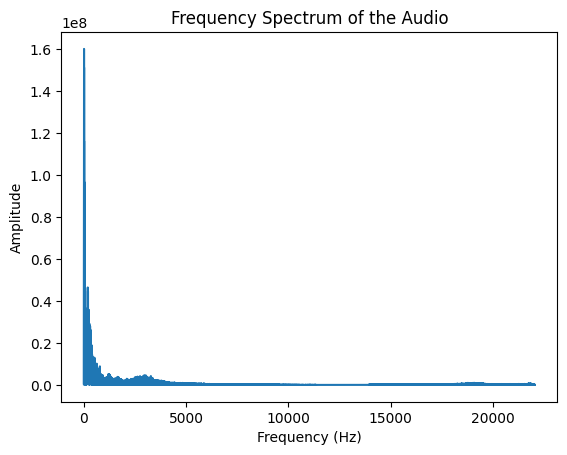

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft

# Convert the audio frames to numpy array
audio_data = np.frombuffer(audio_frames, dtype=np.int16)

# Perform FFT (Fast Fourier Transform) to get frequency components
fft_data = fft(audio_data)
frequencies = np.fft.fftfreq(len(fft_data), 1.0 / frame_rate)

# Plot the frequency spectrum
plt.plot(frequencies[:len(frequencies) // 2], np.abs(fft_data[:len(fft_data) // 2]))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Frequency Spectrum of the Audio')
plt.show()

<b>These steps should provide a good starting point for forensic investigation using Python, helping to identify potential tampering or key audio details.</b>